In [ ]:
# https://www.kaggle.com/uciml/pima-indians-diabetes-database
import pandas as pd
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
demo = pd.read_csv("pima-indians-diabetes.data", names= colnames)
X=demo.drop('class',axis=1)
y=demo['class']
demo.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   preg    768 non-null    int64  
 1   plas    768 non-null    int64  
 2   pres    768 non-null    int64  
 3   skin    768 non-null    int64  
 4   test    768 non-null    int64  
 5   mass    768 non-null    float64
 6   pedi    768 non-null    float64
 7   age     768 non-null    int64  
 8   class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
demo.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


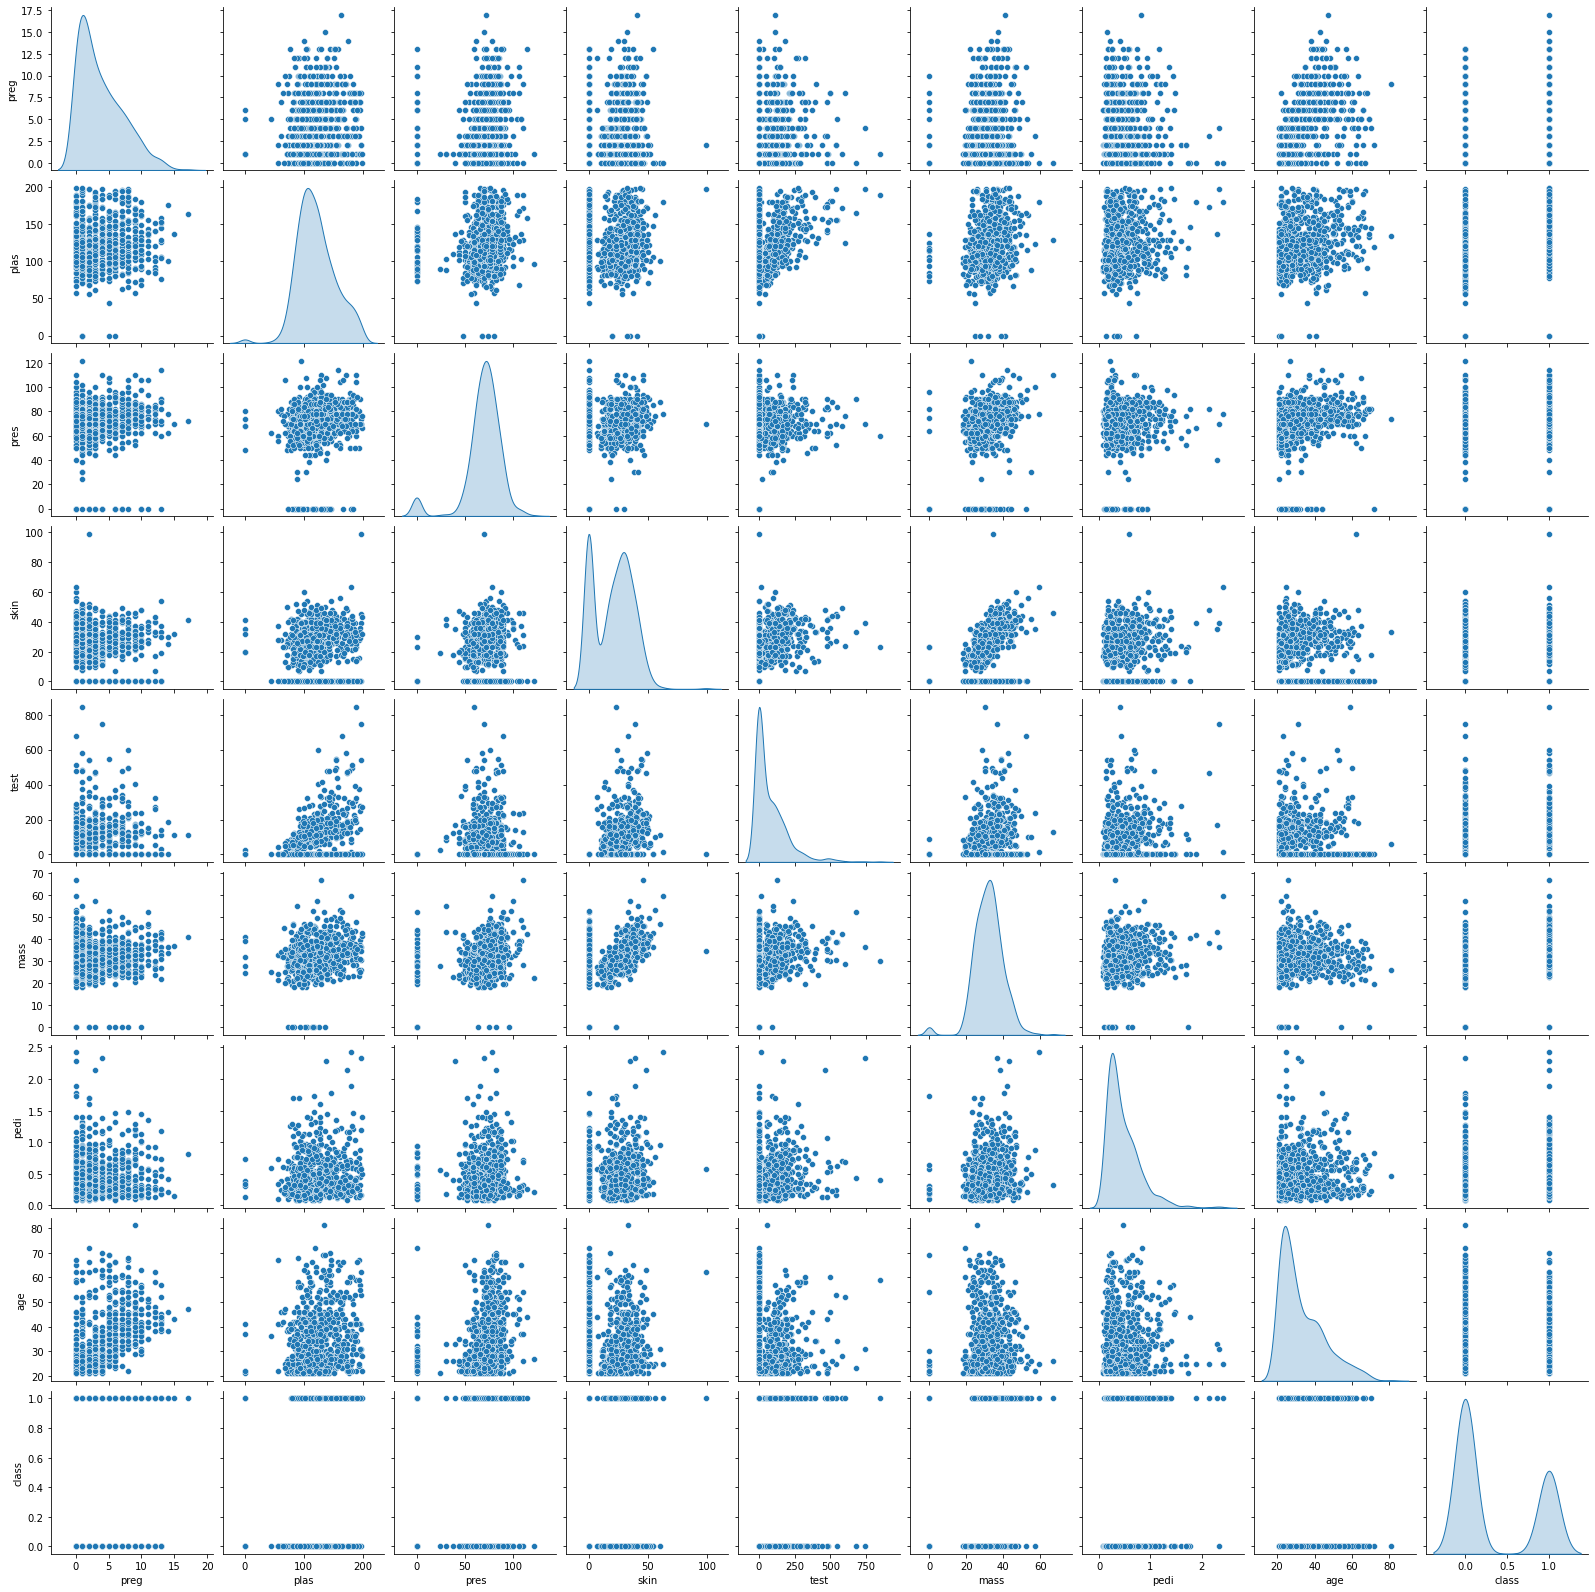

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(demo,diag_kind='kde')

In [ ]:
demo.skew()

preg     0.901674
plas     0.173754
pres    -1.843608
skin     0.109372
test     2.272251
mass    -0.428982
pedi     1.919911
age      1.129597
class    0.635017
dtype: float64

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
dt = GradientBoostingClassifier()
dt.fit(X,y)
dt.feature_importances_

array([0.05378274, 0.40836945, 0.03612637, 0.01790452, 0.04801943,
       0.19369656, 0.10549192, 0.136609  ])

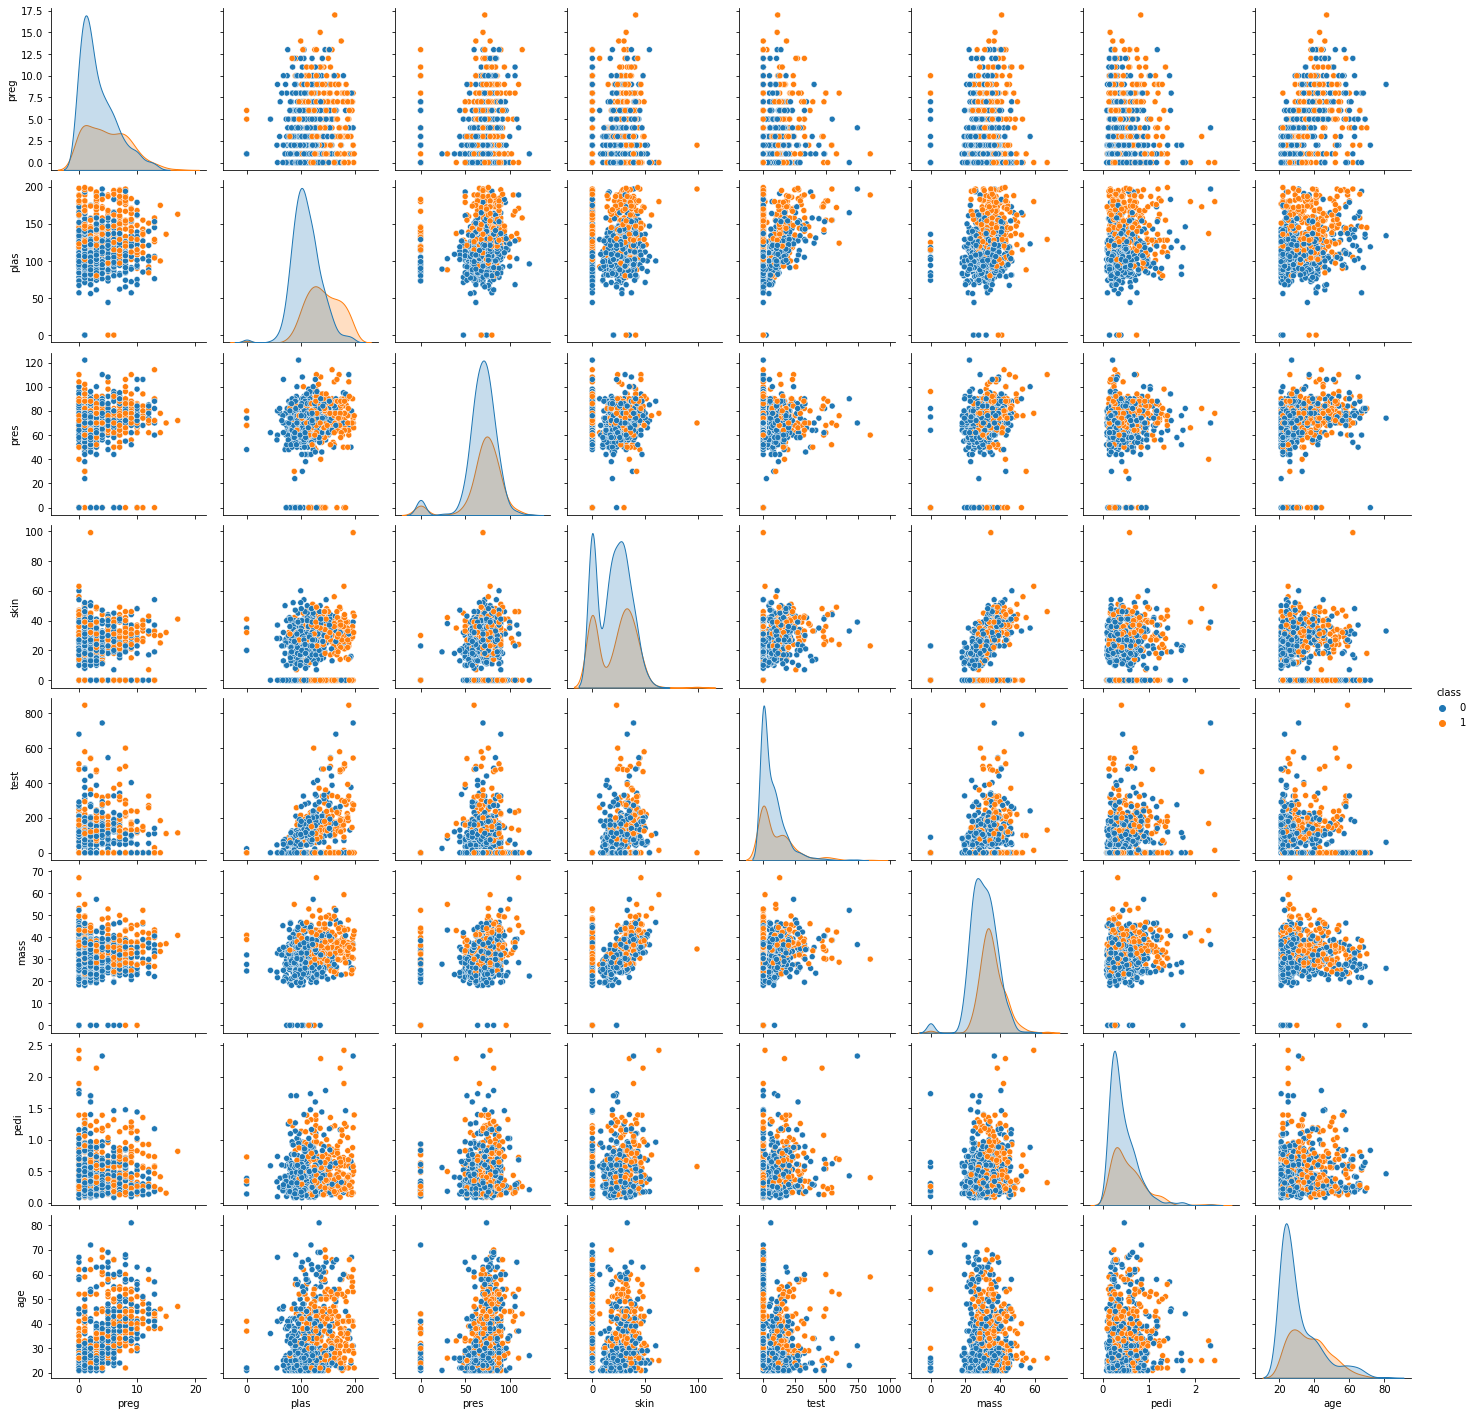

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(demo,diag_kind='kde',hue='class')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=20)
dt = LogisticRegression()
sc=StandardScaler()
scaledXtrain = sc.fit_transform(X_train)
scaledXtest = sc.transform(X_test)
dt.fit(scaledXtrain,y_train)
print("Training Accuracy")
print(dt.score(scaledXtrain,y_train))
print("Testing Accuracy")
print(dt.score(scaledXtest,y_test))

Training Accuracy
0.7850162866449512
Testing Accuracy
0.7532467532467533


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=20)
dt = LogisticRegression()
pt=PowerTransformer()
powerXtrain = pt.fit_transform(X_train)
powerXtest = pt.transform(X_test)
dt.fit(powerXtrain,y_train)
print("Training Accuracy")
print(dt.score(powerXtrain,y_train))
print("Testing Accuracy")
print(dt.score(powerXtest,y_test))

Training Accuracy
0.7801302931596091
Testing Accuracy
0.7467532467532467


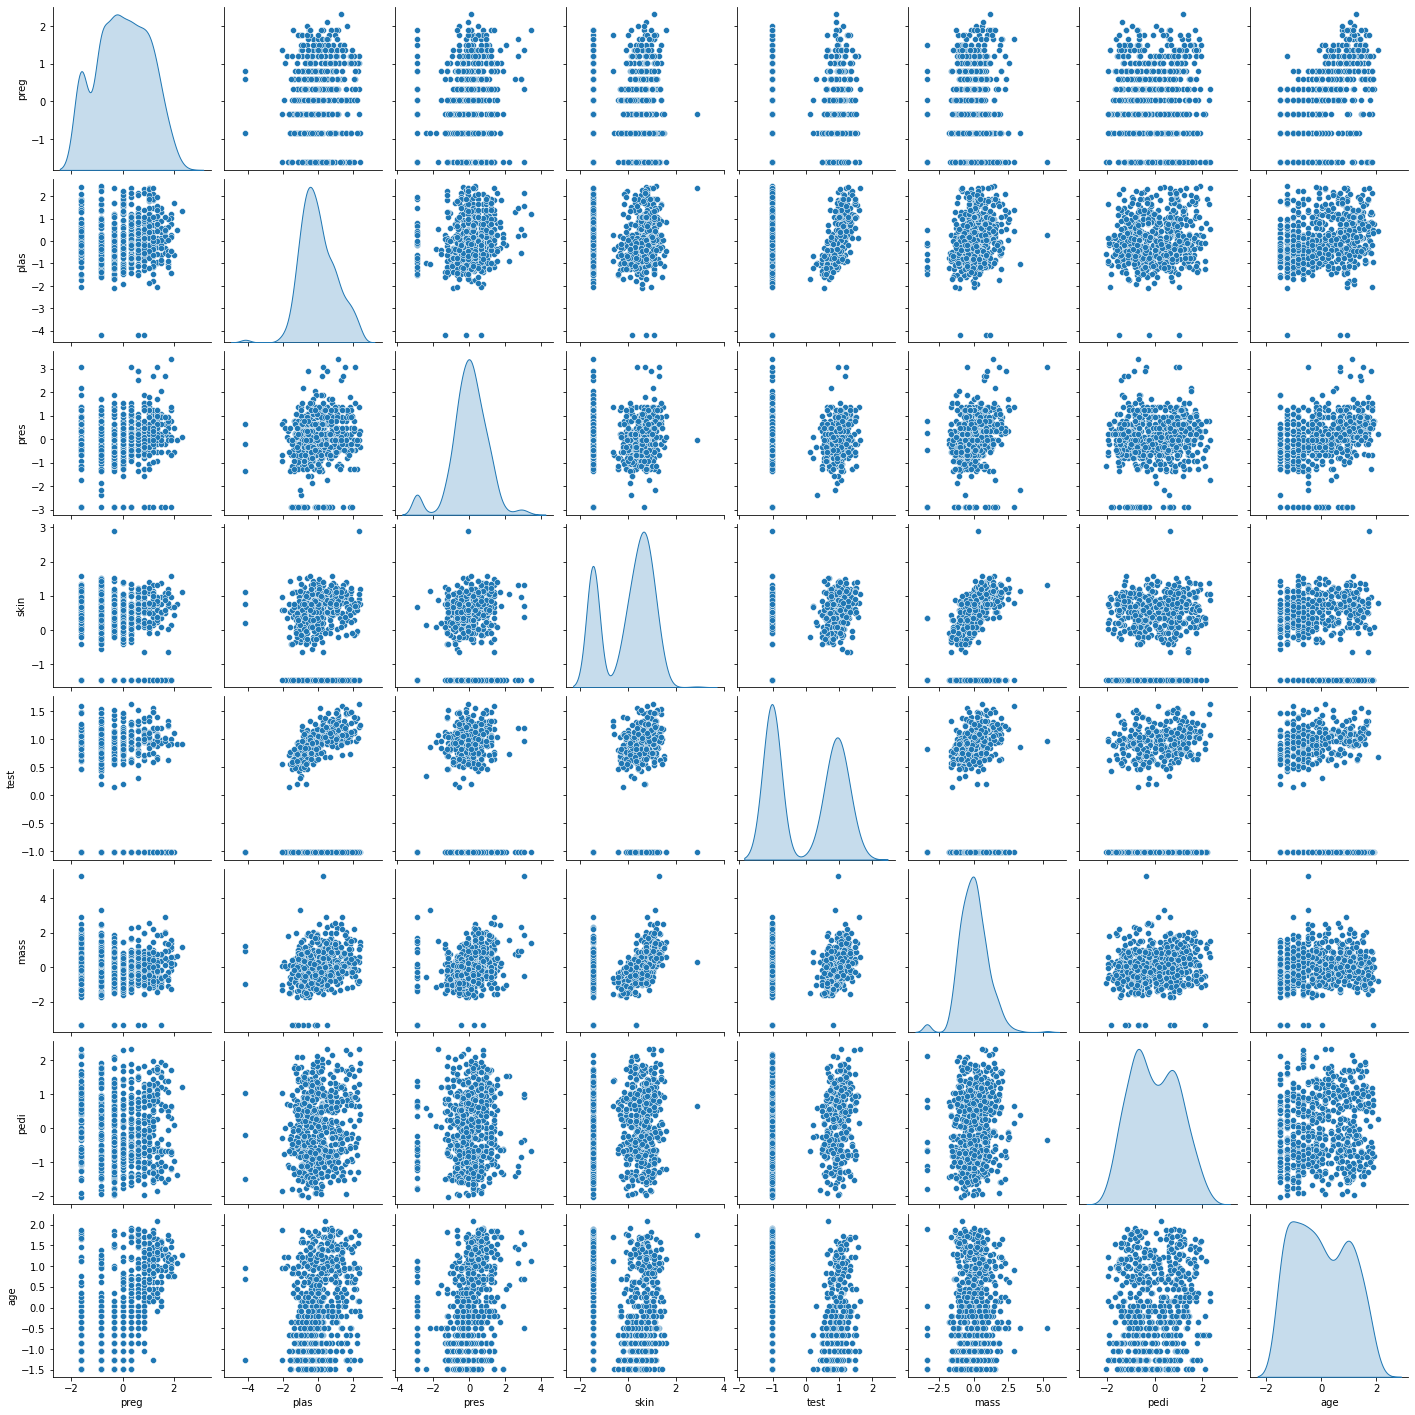

In [ ]:
temp = pd.DataFrame(powerXtrain)
temp.columns = X_train.columns
sns.pairplot(temp,diag_kind='kde')

In [ ]:
#With Pipeline
from sklearn.pipeline import Pipeline
pipe = Pipeline((
("pt", PowerTransformer()),
("dt", LogisticRegression()),
))
pipe.fit(X_train,y_train)
print("Training Accuracy")
print(pipe.score(X_train,y_train))
print("Testing Accuracy")
print(pipe.score(X_test,y_test))

Training Accuracy
0.7801302931596091
Testing Accuracy
0.7467532467532467


In [ ]:
xxx = pd.DataFrame(scaledXtrain)
xxx.columns = X_train.columns
xxx.head()

,preg,plas,pres,skin,test,mass,pedi,age
0,-0.844670,-0.652172,0.159016,-0.551331,-0.088078,-0.858281,0.536640,-0.431718
1,-0.250595,2.233438,-0.055568,-0.360366,0.440046,-0.138690,-0.533988,0.082657
2,-0.250595,-1.349793,0.051724,-1.315192,-0.704223,0.066907,-0.620473,0.511303
3,2.125704,-0.303362,0.802767,1.231009,-0.704223,1.904434,1.332900,1.025678
4,0.343480,-0.366782,0.319953,0.339839,-0.704223,0.516651,0.202628,2.311616


In [ ]:
dt.coef_

array([[ 4.86940128e-01,  1.07872178e+00, -3.96215166e-01,
         2.97753737e-05, -1.94377772e-01,  8.36642294e-01,
         3.53937711e-01,  1.73149188e-01]])

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
dt = LogisticRegression()
dt.fit(X_train,y_train)
print("Training Accuracy")
print(dt.score(X_train,y_train))
print("Testing Accuracy")
print(dt.score(X_test,y_test))
predicted = dt.predict(X_test)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
print(precision_score(y_test,predicted))
print(recall_score(y_test,predicted))
print(f1_score(y_test,predicted))

Training Accuracy
0.7833876221498371
Testing Accuracy
0.7792207792207793
[[89 10]
 [24 31]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154

0.7560975609756098
0.5636363636363636
0.6458333333333333


In [ ]:
X_test.head()

,preg,plas,pres,skin,test,mass,pedi,age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27
352,3,61,82,28,0,34.4,0.243,46
726,1,116,78,29,180,36.1,0.496,25


In [ ]:
dt.predict_proba(X_test)

array([[0.5474997 , 0.4525003 ],
       [0.6872653 , 0.3127347 ],
       [0.84936841, 0.15063159],
       [0.96018065, 0.03981935],
       [0.79995138, 0.20004862],
       [0.75003078, 0.24996922],
       [0.63617517, 0.36382483],
       [0.89929472, 0.10070528],
       [0.86615455, 0.13384545],
       [0.83206647, 0.16793353],
       [0.54729887, 0.45270113],
       [0.92492257, 0.07507743],
       [0.00888178, 0.99111822],
       [0.24786921, 0.75213079],
       [0.94728928, 0.05271072],
       [0.25482598, 0.74517402],
       [0.77578259, 0.22421741],
       [0.68843632, 0.31156368],
       [0.88185325, 0.11814675],
       [0.83296911, 0.16703089],
       [0.55300411, 0.44699589],
       [0.82231255, 0.17768745],
       [0.03131148, 0.96868852],
       [0.73549233, 0.26450767],
       [0.93214871, 0.06785129],
       [0.62529888, 0.37470112],
       [0.8265275 , 0.1734725 ],
       [0.19131838, 0.80868162],
       [0.91557083, 0.08442917],
       [0.42030169, 0.57969831],
       [0.

In [ ]:
dt.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
sc=StandardScaler()
scaledXtrain = sc.fit_transform(X_train)
scaledXtest = sc.transform(X_test)
dt.fit(scaledXtrain,y_train)
print("Training Accuracy")
print(dt.score(scaledXtrain,y_train))
print("Testing Accuracy")
print(dt.score(scaledXtest,y_test))
predicted = dt.predict(scaledXtest)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

Training Accuracy
0.7361563517915309
Testing Accuracy
0.7337662337662337
[[77 22]
 [19 36]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        99
           1       0.62      0.65      0.64        55

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.74       154



In [ ]:
#With Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
pipe = Pipeline((
#("pt", PowerTransformer()),
#("scaler", StandardScaler()),
("dt", DecisionTreeClassifier(criterion = 'entropy',max_depth=1)),
))
pipe.fit(X_train,y_train)
print("Training Accuracy")
print(pipe.score(X_train,y_train))
print("Testing Accuracy")
print(pipe.score(X_test,y_test))

Training Accuracy
0.7361563517915309
Testing Accuracy
0.7337662337662337


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
lr = LogisticRegression()
sc=StandardScaler()
scaledXtrain = sc.fit_transform(X_train)
scaledXtest = sc.transform(X_test)
lr.fit(scaledXtrain,y_train)
print("Training Accuracy")
print(lr.score(scaledXtrain,y_train))
print("Testing Accuracy")
print(lr.score(scaledXtest,y_test))
predicted = lr.predict(scaledXtest)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
print(precision_score(y_test,predicted))
print(recall_score(y_test,predicted))
print(f1_score(y_test,predicted))

Training Accuracy
0.7752442996742671
Testing Accuracy
0.7792207792207793
[[89 10]
 [24 31]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154

0.7560975609756098
0.5636363636363636
0.6458333333333333


In [ ]:
#GradientBoostingClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
demo = pd.read_csv("pima-indians-diabetes.data", names= colnames)
X=demo.drop('class',axis=1)
y=demo['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
lr = GradientBoostingClassifier(n_estimators=300)
sc=StandardScaler()
scaledXtrain = sc.fit_transform(X_train)
scaledXtest = sc.transform(X_test)
lr.fit(scaledXtrain,y_train)
print("Training Accuracy")
print(lr.score(scaledXtrain,y_train))
print("Testing Accuracy")
print(lr.score(scaledXtest,y_test))
predicted = lr.predict(scaledXtest)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
print(precision_score(y_test,predicted))
print(recall_score(y_test,predicted))
print(f1_score(y_test,predicted))

Training Accuracy
0.996742671009772
Testing Accuracy
0.8116883116883117
[[88 11]
 [18 37]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        99
           1       0.77      0.67      0.72        55

    accuracy                           0.81       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.81      0.81       154

0.7708333333333334
0.6727272727272727
0.7184466019417476


In [ ]:
#KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
demo = pd.read_csv("pima-indians-diabetes.data", names= colnames)
X=demo.drop('class',axis=1)
y=demo['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)
lr = KNeighborsClassifier(n_neighbors=3)
sc=StandardScaler()
scaledXtrain = sc.fit_transform(X_train)
scaledXtest = sc.transform(X_test)
lr.fit(scaledXtrain,y_train)
print("Training Accuracy")
print(lr.score(scaledXtrain,y_train))
print("Testing Accuracy")
print(lr.score(scaledXtest,y_test))
predicted = lr.predict(scaledXtest)
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
print(precision_score(y_test,predicted))
print(recall_score(y_test,predicted))
print(f1_score(y_test,predicted))

Training Accuracy
0.8338762214983714
Testing Accuracy
0.7272727272727273
[[83 16]
 [26 29]]
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        99
           1       0.64      0.53      0.58        55

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154

0.6444444444444445
0.5272727272727272
0.58
